In [1]:
import pandas as pandas



In [2]:
df=pandas.read_csv('India-Tourism-Statistics-2022-Table-2.1.4.csv')


In [3]:
df.shape

(83, 12)

In [4]:
missing_columns= df.columns[df.isnull().any()]
print (missing_columns)

Index(['Number of Arrivals-2017', 'Number of Arrivals-2018',
       'Number of Arrivals-2020', 'Percentage Share  - 2018/17',
       'Percentage Share  - 2019/18', 'Percentage Share  - 2020/19',
       'Percentage Change - 2021/20', 'Percentage Change - 2021'],
      dtype='object')


In [5]:
df['Number of Arrivals-2017'].isnull().sum()

np.int64(1)

In [6]:
df['Number of Arrivals-2020'].isnull().sum()

np.int64(1)

In [7]:
df['Percentage Share  - 2018/17'].isnull().sum()

np.int64(1)

In [8]:
df['Percentage Share  - 2019/18'].isnull().sum()

np.int64(1)

In [9]:
df['Percentage Share  - 2020/19'].isnull().sum()

np.int64(1)

In [10]:
df['Number of Arrivals-2018'].isnull().sum()

np.int64(1)

In [11]:
df['Percentage Change - 2021/20'].isnull().sum()

np.int64(1)

In [12]:
df['Percentage Change - 2021/20'].isnull().sum()

np.int64(1)

df.drop_duplicates()


In [13]:
missing_columns= df.columns[df.isnull().any()].tolist()
print(missing_columns)

['Number of Arrivals-2017', 'Number of Arrivals-2018', 'Number of Arrivals-2020', 'Percentage Share  - 2018/17', 'Percentage Share  - 2019/18', 'Percentage Share  - 2020/19', 'Percentage Change - 2021/20', 'Percentage Change - 2021']


In [14]:
df_cleaned = df.dropna()

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape after dropping NA values: {df_cleaned.shape}")
print("\nMissing Values per Column in Cleaned DataFrame:")
print(df_cleaned.isnull().sum())

Original DataFrame shape: (83, 12)
Cleaned DataFrame shape after dropping NA values: (82, 12)

Missing Values per Column in Cleaned DataFrame:
Region                         0
Country of Nationality         0
Number of Arrivals-2017        0
Number of Arrivals-2018        0
Number of Arrivals-2019        0
Number of Arrivals-2020        0
Number of Arrivals-2021        0
Percentage Share  - 2018/17    0
Percentage Share  - 2019/18    0
Percentage Share  - 2020/19    0
Percentage Change - 2021/20    0
Percentage Change - 2021       0
dtype: int64


In [15]:
columns_to_convert_to_int = [
    'Number of Arrivals-2017',
    'Number of Arrivals-2018',
    'Number of Arrivals-2020'
]

for col in columns_to_convert_to_int:
    # Use .loc for safe assignment and type conversion
    df_cleaned.loc[:, col] = df_cleaned[col].astype(int)

print("\nFirst 5 rows of the Cleaned DataFrame (after type conversion):")
df_cleaned.head()

print("\nCleaned DataFrame Info (after type conversion):")
df_cleaned.info()


First 5 rows of the Cleaned DataFrame (after type conversion):

Cleaned DataFrame Info (after type conversion):
<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 82
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       82 non-null     object 
 1   Country of Nationality       82 non-null     object 
 2   Number of Arrivals-2017      82 non-null     float64
 3   Number of Arrivals-2018      82 non-null     float64
 4   Number of Arrivals-2019      82 non-null     int64  
 5   Number of Arrivals-2020      82 non-null     float64
 6   Number of Arrivals-2021      82 non-null     int64  
 7   Percentage Share  - 2018/17  82 non-null     float64
 8   Percentage Share  - 2019/18  82 non-null     float64
 9   Percentage Share  - 2020/19  82 non-null     float64
 10  Percentage Change - 2021/20  82 non-null     float64
 11  Percentage Change - 2021     8

In [16]:
import altair as alt 
df_filtered_for_analysis = df_cleaned[
    (df_cleaned['Country of Nationality'] != 'Total') &
    (df_cleaned['Region'] != 'Grand Total')
]
regional_arrivals = df_filtered_for_analysis.groupby('Region')[[
    'Number of Arrivals-2017',
    'Number of Arrivals-2018',
    'Number of Arrivals-2019',
    'Number of Arrivals-2020',
    'Number of Arrivals-2021'
]].sum()

print("Total Number of Arrivals per Region (2017-2021, excluding 'Total' and 'Grand Total'):")
regional_arrivals

Total Number of Arrivals per Region (2017-2021, excluding 'Total' and 'Grand Total'):


,Number of Arrivals-2017,Number of Arrivals-2018,Number of Arrivals-2019,Number of Arrivals-2020,Number of Arrivals-2021
Region,,,,,
Africa,318023.0,351198.0,362308,90296.0,68914
Australasia,386059.0,412628.0,438939,105047.0,38865
Central and South America,92067.0,101085.0,98926,26968.0,6798
East Asia,663295.0,724568.0,782225,130383.0,33762
Eastern Europe,472872.0,466049.0,456481,168145.0,43114
North America,1712358.0,1807718.0,1863891,516960.0,510297
Not Classified elsewhere,23456.0,10037.0,10841,3018.0,1142
South Asia,2951665.0,3104422.0,3375819,750061.0,398722
South East Asia,824575.0,887088.0,930540,231622.0,38474


In [17]:
countries_only_df = df_cleaned[df_cleaned['Country of Nationality'] != 'Total']
top_10_countries_2021 = countries_only_df.sort_values(
    by='Number of Arrivals-2021', ascending=False
).head(10)

print("Top 10 Countries with Highest Number of Arrivals in 2021:")
top_10_countries_2021[['Country of Nationality', 'Number of Arrivals-2021']]
chart = alt.Chart(top_10_countries_2021).mark_bar().encode(
    x=alt.X('Number of Arrivals-2021', title='Number of Arrivals in 2021'),
    y=alt.Y('Country of Nationality', sort='-x', title='Country of Nationality'),
    tooltip=['Country of Nationality', 'Number of Arrivals-2021']
).properties(
    title='Top 10 Countries by Number of Arrivals in 2021'
)
chart


Top 10 Countries with Highest Number of Arrivals in 2021:


alt.Chart(...)

In [18]:

overall_arrivals_trend = df_cleaned[df_cleaned['Region'] == 'Grand Total'][
    ['Number of Arrivals-2017', 'Number of Arrivals-2018', 'Number of Arrivals-2019', 'Number of Arrivals-2020', 'Number of Arrivals-2021']
]

overall_arrivals_transposed = overall_arrivals_trend.T.reset_index()
overall_arrivals_transposed.columns = ['Year', 'Total Arrivals']
overall_arrivals_transposed['Year'] = overall_arrivals_transposed['Year'].str.replace('Number of Arrivals-', '')
overall_arrivals_transposed['Year'] = overall_arrivals_transposed['Year'].astype(int) # Convert year to integer

print("Overall Tourist Arrivals Trend (2017-2021):")
print(overall_arrivals_transposed.to_markdown(index=False, numalign="left", stralign="left"))

chart_overall_trend = alt.Chart(overall_arrivals_transposed).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'), # :O means ordinal, ensures years are treated as discrete categories for labels
    y=alt.Y('Total Arrivals', title='Total Number of Arrivals'),
    tooltip=['Year', 'Total Arrivals']
).properties(
    title='Total International Tourist Arrivals to India (2017-2021)'
)

chart_overall_trend.save('overall_arrivals_trend.html') # Save as HTML
chart_overall_trend 

Overall Tourist Arrivals Trend (2017-2021):
| Year   | Total Arrivals   |
|:-------|:-----------------|
| 2017   | 1.00358e+07      |
| 2018   | 1.0558e+07       |
| 2019   | 1.09304e+07      |
| 2020   | 2.74477e+06      |
| 2021   | 1.52711e+06      |


alt.Chart(...)

In [19]:

regional_arrivals_melted = regional_arrivals.reset_index().melt(
    id_vars=['Region'],
    var_name='Year',
    value_name='Number of Arrivals'
)

regional_arrivals_melted['Year'] = regional_arrivals_melted['Year'].str.replace('Number of Arrivals-', '')
regional_arrivals_melted['Year'] = regional_arrivals_melted['Year'].astype(int)

print("\nMelted Regional Arrivals (first 5 rows):")
print(regional_arrivals_melted.head().to_markdown(index=False, numalign="left", stralign="left"))

chart_regional_contribution = alt.Chart(regional_arrivals_melted).mark_bar().encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Number of Arrivals', title='Total Number of Arrivals'),
    color='Region', # Color bars by region
    tooltip=['Year', 'Region', 'Number of Arrivals']
).properties(
    title='Regional Contribution to International Tourist Arrivals'
)

chart_regional_contribution.save('regional_contributions.html') # Save as HTML
chart_regional_contribution


Melted Regional Arrivals (first 5 rows):
| Region                    | Year   | Number of Arrivals   |
|:--------------------------|:-------|:---------------------|
| Africa                    | 2017   | 318023               |
| Australasia               | 2017   | 386059               |
| Central and South America | 2017   | 92067                |
| East Asia                 | 2017   | 663295               |
| Eastern Europe            | 2017   | 472872               |


alt.Chart(...)

In [20]:

df_change_analysis = df_cleaned[
    (df_cleaned['Country of Nationality'] != 'Total') &
    (df_cleaned['Region'] != 'Grand Total')
].copy()
top_10_increases_2021_20 = df_change_analysis.sort_values(
    by='Percentage Change - 2021/20', ascending=False
).head(10)

bottom_10_decreases_2021_20 = df_change_analysis.sort_values(
    by='Percentage Change - 2021/20', ascending=True
).head(10)

print("\nTop 10 Countries/Regions by Percentage Increase in Arrivals (2021/2020):")
print(top_10_increases_2021_20[['Country of Nationality', 'Percentage Change - 2021/20']].to_markdown(index=False, numalign="left", stralign="left"))

print("\nTop 10 Countries/Regions by Percentage Decrease in Arrivals (2021/2020):")
print(bottom_10_decreases_2021_20[['Country of Nationality', 'Percentage Change - 2021/20']].to_markdown(index=False, numalign="left", stralign="left"))
top_bottom_changes = pandas.concat([top_10_increases_2021_20.head(5), bottom_10_decreases_2021_20.head(5)])

chart_percentage_change = alt.Chart(top_bottom_changes).mark_bar().encode(
    x=alt.X('Percentage Change - 2021/20', title='Percentage Change (2021/2020)'),
    y=alt.Y('Country of Nationality', sort='-x', title='Country/Region'),
    color=alt.condition(
        alt.datum['Percentage Change - 2021/20'] > 0,
        alt.value('green'),  # Positive change in green
        alt.value('red')     # Negative change in red
    ),
    tooltip=['Country of Nationality', 'Percentage Change - 2021/20']
).properties(
    title='Top 5 Increases and Top 5 Decreases in Arrivals (2021/2020)'
)

chart_percentage_change.save('percentage_change_2021_20.html') # Save as HTML
chart_percentage_change 


Top 10 Countries/Regions by Percentage Increase in Arrivals (2021/2020):
| Country of Nationality   | Percentage Change - 2021/20   |
|:-------------------------|:------------------------------|
| Maldives                 | 82.8                          |
| Nigeria                  | 44.4                          |
| Nepal                    | 28.7                          |
| U. S. A                  | 9.1                           |
| Yemen Arab Rep.          | 6                             |
| Kenya                    | 4.6                           |
| Portugal                 | 3.4                           |
| Tanzania                 | -0.3                          |
| Others                   | -0.5                          |
| Iraq                     | -9                            |

Top 10 Countries/Regions by Percentage Decrease in Arrivals (2021/2020):
| Country of Nationality   | Percentage Change - 2021/20   |
|:-------------------------|:------------------------------

alt.Chart(...)

In [21]:

# Make sure cell 14 has been executed so df_cleaned is defined
countries_only_df = df_cleaned[df_cleaned['Country of Nationality'] != 'Total'].copy()

def categorize_volume(arrivals):
    if arrivals > 200000:
        return 'High Volume'
    elif 50000 <= arrivals <= 200000:
        return 'Medium Volume'
    else:
        return 'Low Volume'

countries_only_df['Arrivals Tier 2019'] = countries_only_df['Number of Arrivals-2019'].apply(categorize_volume)

print("First 5 rows with new 'Arrivals Tier 2019' column:")
print(countries_only_df[['Country of Nationality', 'Number of Arrivals-2019', 'Arrivals Tier 2019']].head().to_markdown(index=False, numalign="left", stralign="left"))

melted_df = countries_only_df.melt(
    id_vars=['Arrivals Tier 2019'],
    value_vars=['Number of Arrivals-2019', 'Number of Arrivals-2020', 'Number of Arrivals-2021'],
    var_name='Year',
    value_name='Arrivals'
)

melted_df['Year'] = melted_df['Year'].str.replace('Number of Arrivals-', '').astype(int)

cohort_performance = melted_df.groupby(['Arrivals Tier 2019', 'Year'])['Arrivals'].sum().reset_index()

print("\nTotal Arrivals by Cohort Tier and Year:")
print(cohort_performance.to_markdown(index=False, numalign="left", stralign="left"))

First 5 rows with new 'Arrivals Tier 2019' column:
| Country of Nationality   | Number of Arrivals-2019   | Arrivals Tier 2019   |
|:-------------------------|:--------------------------|:---------------------|
| Canada                   | 351859                    | High Volume          |
| U. S. A                  | 1512032                   | High Volume          |
| Argentina                | 12844                     | Low Volume           |
| Brazil                   | 25422                     | Low Volume           |
| Mexico                   | 20766                     | Low Volume           |

Total Arrivals by Cohort Tier and Year:
| Arrivals Tier 2019   | Year   | Arrivals    |
|:---------------------|:-------|:------------|
| High Volume          | 2019   | 1.87468e+07 |
| High Volume          | 2020   | 4.66492e+06 |
| High Volume          | 2021   | 2.60916e+06 |
| Low Volume           | 2019   | 1.01556e+06 |
| Low Volume           | 2020   | 277560      |
| Low Volume

In [22]:

cohort_chart = alt.Chart(cohort_performance).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Arrivals', title='Total Number of Arrivals'),
    color=alt.Color('Arrivals Tier 2019', title='2019 Arrival Volume Tier'),
    tooltip=['Year', 'Arrivals Tier 2019', 'Arrivals']
).properties(
    title='Impact of Pandemic on Different Tourist Market Tiers'
).interactive()

cohort_chart.save('cohort_performance_chart.html')
cohort_chart

alt.Chart(...)

In [23]:

%pip install prophet

import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.express as px


total_arrivals_df = df_cleaned[df_cleaned['Region'] == 'Grand Total'][[
    'Number of Arrivals-2017', 'Number of Arrivals-2018', 'Number of Arrivals-2019', 'Number of Arrivals-2020', 'Number of Arrivals-2021'
]].T.reset_index()

total_arrivals_df.columns = ['ds', 'y']
total_arrivals_df['ds'] = total_arrivals_df['ds'].str.replace('Number of Arrivals-', '').astype(int)
total_arrivals_df['ds'] = pd.to_datetime(total_arrivals_df['ds'], format='%Y')

print("Data prepared for Prophet model:")
print(total_arrivals_df.to_markdown(index=False, numalign="left", stralign="left"))

model = Prophet()
model.fit(total_arrivals_df)


future = model.make_future_dataframe(periods=2, freq='Y')
forecast = model.predict(future)

# Plot the forecast
# This will generate a nice, interactive plot in your notebook
fig = plot_plotly(model, forecast)
fig.show()

# Print the forecast for 2022 and 2023
print("\nForecasted Tourist Arrivals:")
print(forecast[['ds', 'yhat']].tail(3).to_markdown(index=False, numalign="left", stralign="left"))

Note: you may need to restart the kernel to use updated packages.


02:47:42 - cmdstanpy - INFO - Chain [1] start processing
02:47:42 - cmdstanpy - INFO - Chain [1] done processing


Data prepared for Prophet model:
| ds                  | y           |
|:--------------------|:------------|
| 2017-01-01 00:00:00 | 1.00358e+07 |
| 2018-01-01 00:00:00 | 1.0558e+07  |
| 2019-01-01 00:00:00 | 1.09304e+07 |
| 2020-01-01 00:00:00 | 2.74477e+06 |
| 2021-01-01 00:00:00 | 1.52711e+06 |


/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(



Forecasted Tourist Arrivals:
| ds                  | yhat         |
|:--------------------|:-------------|
| 2021-01-01 00:00:00 | 1.55285e+06  |
| 2021-12-31 00:00:00 | 746592       |
| 2022-12-31 00:00:00 | -1.61978e+06 |


In [24]:

import pandas as pd
import numpy as np


countries_df = df_cleaned[df_cleaned['Country of Nationality'] != 'Total'].copy()

arrivals_2019 = countries_df['Number of Arrivals-2019']
arrivals_2021 = countries_df['Number of Arrivals-2021']

correlation = np.corrcoef(arrivals_2019, arrivals_2021)[0, 1]

print(f"Pearson Correlation between 2019 and 2021 arrivals: {correlation:.2f}")

if correlation > 0.8:
    print("A high positive correlation suggests that countries with high pre-pandemic arrivals also had high post-pandemic arrivals, indicating consistent market importance.")
elif correlation > 0.5:
    print("A moderate positive correlation suggests some relationship, but with shifts in market importance.")
else:
    print("A low correlation suggests a significant shift in which countries were key tourist sources before and after the pandemic.")

Pearson Correlation between 2019 and 2021 arrivals: 0.99
A high positive correlation suggests that countries with high pre-pandemic arrivals also had high post-pandemic arrivals, indicating consistent market importance.


In [25]:

import pandas as pd
import altair as alt

df_filtered_for_analysis = df_cleaned[
    (df_cleaned['Country of Nationality'] != 'Total') &
    (df_cleaned['Region'] != 'Grand Total')
]

regional_arrivals_melted = df_filtered_for_analysis.groupby('Region')[[
    'Number of Arrivals-2019', 'Number of Arrivals-2020', 'Number of Arrivals-2021'
]].sum().reset_index().melt(
    id_vars='Region',
    var_name='Year',
    value_name='Number of Arrivals'
)

regional_arrivals_melted['Year'] = regional_arrivals_melted['Year'].str.replace('Number of Arrivals-', '')

base = alt.Chart(regional_arrivals_melted).encode(
    x=alt.X('Year:O', title='Year'),
    color=alt.Color('Region', title='Region')
)

bars = base.mark_bar().encode(
    y=alt.Y('Number of Arrivals', stack='zero')
)

text = base.mark_text(
    align='center',
    baseline='middle',
    dy=-15
).encode(
    y=alt.Y('sum(Number of Arrivals)', stack='zero', axis=None),
    text=alt.Text('sum(Number of Arrivals)', format=',.0f'),
    color=alt.value('black') 
)

chart_with_totals = (bars + text).properties(
    title='Regional Contributions to Tourist Arrivals (with Totals)'
)

chart_with_totals.save('annotated_stacked_bar_chart.html')
chart_with_totals

alt.LayerChart(...)

In [26]:

df_cleaned.to_csv('cleaned_tourism_data.csv', index=False)

print("Your cleaned data has been saved to 'cleaned_tourism_data.csv'.")

Your cleaned data has been saved to 'cleaned_tourism_data.csv'.


Model Performance:
Mean Squared Error (MSE): 126092787.27
R-squared (R2) score: 0.71


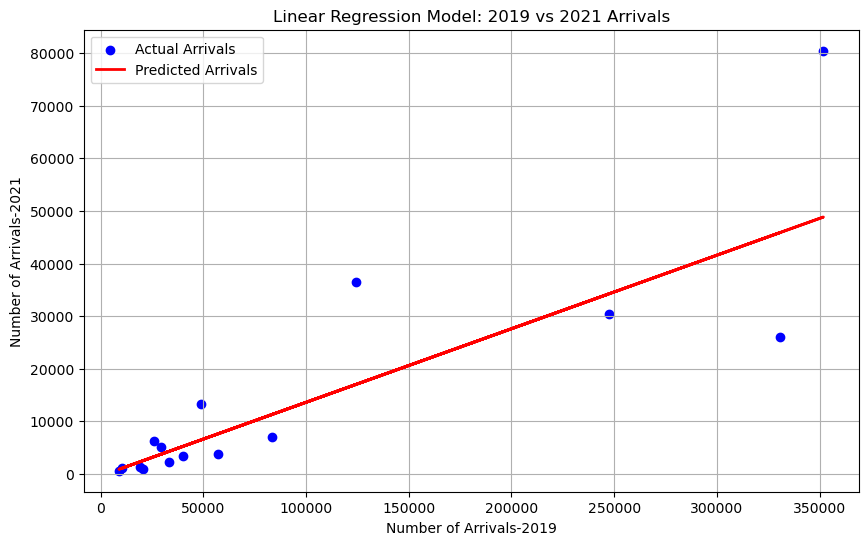

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

try:
    df_cleaned = pd.read_csv('cleaned_tourism_data.csv')
except FileNotFoundError:
    print("The file 'cleaned_tourism_data.csv' was not found. Please ensure it has been created.")
    

df_model = df_cleaned[df_cleaned['Country of Nationality'] != 'Total'].copy()


X = df_model[['Number of Arrivals-2019']]

y = df_model['Number of Arrivals-2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R2) score: {r2_score(y_test, y_pred):.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Arrivals')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Arrivals')
plt.title('Linear Regression Model: 2019 vs 2021 Arrivals')
plt.xlabel('Number of Arrivals-2019')
plt.ylabel('Number of Arrivals-2021')
plt.legend()
plt.grid(True)
plt.savefig('linear_regression_predictions.png')

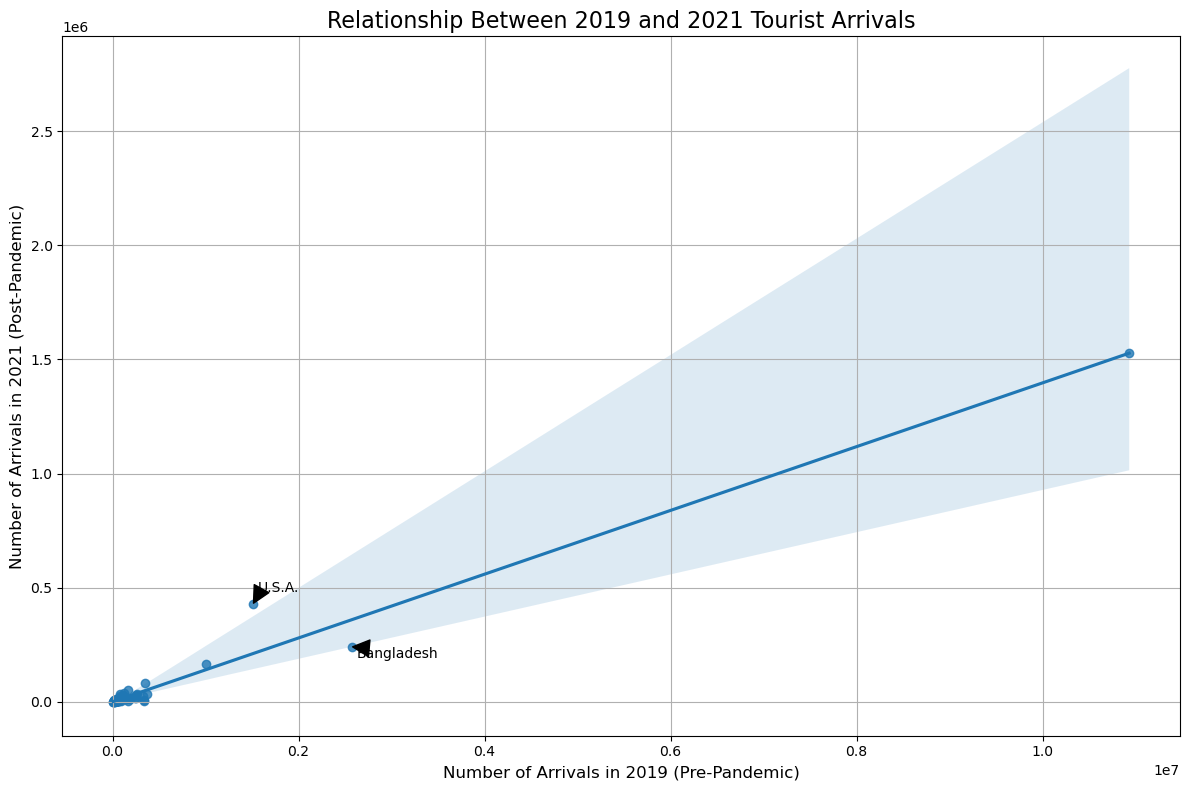

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df_cleaned = pd.read_csv('cleaned_tourism_data.csv')
except FileNotFoundError:
    print("The file 'cleaned_tourism_data.csv' was not found. Please ensure it has been created.")

df_plot = df_cleaned[df_cleaned['Country of Nationality'] != 'Total'].copy()

plt.figure(figsize=(12, 8))
sns.regplot(x='Number of Arrivals-2019', y='Number of Arrivals-2021', data=df_plot)

plt.title('Relationship Between 2019 and 2021 Tourist Arrivals', fontsize=16)
plt.xlabel('Number of Arrivals in 2019 (Pre-Pandemic)', fontsize=12)
plt.ylabel('Number of Arrivals in 2021 (Post-Pandemic)', fontsize=12)

usa_row = df_plot[df_plot['Country of Nationality'] == 'U. S. A']
bangladesh_row = df_plot[df_plot['Country of Nationality'] == 'Bangladesh']

plt.annotate('U.S.A.', xy=(usa_row['Number of Arrivals-2019'].iloc[0], usa_row['Number of Arrivals-2021'].iloc[0]),
             xytext=(usa_row['Number of Arrivals-2019'].iloc[0] + 50000, usa_row['Number of Arrivals-2021'].iloc[0] + 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

plt.annotate('Bangladesh', xy=(bangladesh_row['Number of Arrivals-2019'].iloc[0], bangladesh_row['Number of Arrivals-2021'].iloc[0]),
             xytext=(bangladesh_row['Number of Arrivals-2019'].iloc[0] + 50000, bangladesh_row['Number of Arrivals-2021'].iloc[0] - 50000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)


plt.grid(True)
plt.tight_layout()
plt.savefig('seaborn_scatter_plot.png')
plt.show()